### Name: Dhaval Patel
### Title: Assignment 2 - Tree Based Models


In [227]:
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.tree import _tree

from operator import itemgetter #This will be used to grab variables out of random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

sns.set()

In [228]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-228-1390d13c0cdd>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [229]:
INFILE = "cleandata_hmeqloss.csv"

TARGET_F = "TARGET_BAD_FLAG"
TARGET_A = "TARGET_LOSS_AMT"

df = pd.read_csv( INFILE )

'''
Print a transpose of the data so that it will fit on the screen
'''
# print( df.head() )
# print( df.head().T )
# df.head()
df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1.000000,1.000000,1.000000,1.000000,0.000000
TARGET_LOSS_AMT,641.000000,1109.000000,767.000000,1425.000000,NaN
LOAN,1100.000000,1300.000000,1500.000000,1500.000000,1700.000000
z_REASON_DebtCon,0.000000,0.000000,0.000000,0.000000,0.000000
z_REASON_HomeImp,1.000000,1.000000,1.000000,0.000000,1.000000
z_JOB_Mgr,0.000000,0.000000,0.000000,0.000000,0.000000
z_JOB_Office,0.000000,0.000000,0.000000,0.000000,1.000000
z_JOB_Other,1.000000,1.000000,1.000000,0.000000,0.000000
z_JOB_ProfExe,0.000000,0.000000,0.000000,0.000000,0.000000
z_JOB_Sales,0.000000,0.000000,0.000000,0.000000,0.000000


### SPLIT DATA 
- First, we are going to make an exact copy of the dataframe with target variables safe in X this is the data we will use to predict the targets 
- We are removing TARGET variables from dataframe. We only want the variable, that we want to use to predict
- Y is another which is only going to have target variables in it.
- We will use X variables to predict my Y variables 
- We don't want use all of X variables to predict all of Y variables because we want to have hold out sample to test our model 

In [230]:
"""
SPLIT DATA 
"""
X = df.copy() #making an exact copy of our dataframe
X = X.drop(TARGET_F, axis=1) #dropping target flag variable
X = X.drop(TARGET_A, axis=1) #dropping target damage amount variable


In [231]:
X.head().T #Only thing we have is input data variables that we will use to build our models

,0,1,2,3,4
LOAN,1100.000000,1300.000000,1500.000000,1500.000000,1700.000000
z_REASON_DebtCon,0.000000,0.000000,0.000000,0.000000,0.000000
z_REASON_HomeImp,1.000000,1.000000,1.000000,0.000000,1.000000
z_JOB_Mgr,0.000000,0.000000,0.000000,0.000000,0.000000
z_JOB_Office,0.000000,0.000000,0.000000,0.000000,1.000000
z_JOB_Other,1.000000,1.000000,1.000000,0.000000,0.000000
z_JOB_ProfExe,0.000000,0.000000,0.000000,0.000000,0.000000
z_JOB_Sales,0.000000,0.000000,0.000000,0.000000,0.000000
z_JOB_Self,0.000000,0.000000,0.000000,0.000000,0.000000
M_VALUE,0.000000,0.000000,0.000000,1.000000,0.000000


In [232]:
Y = df[[TARGET_F, TARGET_A]] #Y variable is only going to have target variables
Y.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1.0,1.0,1.0,1.0,0.0
TARGET_LOSS_AMT,641.0,1109.0,767.0,1425.0,NaN


### Train Test Split
- We are going to send our X and Y value. We would like to use 80% of the data for training (Python is going to randomly take 80% of the data for training) 
- It going to randomly take 20% out for testing and random_state is set to 1. 
- X_train and Y_train will have 80% of the data 
- X_test and Y_test will have 20% of the data

- Training dataset has 27 variables and 4768 records in training 
- Test dataset has same 27 variables as well and 1192 records in test

In [233]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)

In [234]:
print("FLAG DATA")
print("TRAINING DATA", X_train.shape)
print("TEST DATA", X_test.shape)

FLAG DATA
TRAINING DATA (4768, 27)
TEST DATA (1192, 27)


In [235]:
X_train.head().T

,5292,1162,2355,3620,1247
LOAN,29000.000000,10000.000000,14200.000000,19000.000000,10200.000000
z_REASON_DebtCon,1.000000,0.000000,1.000000,1.000000,0.000000
z_REASON_HomeImp,0.000000,1.000000,0.000000,0.000000,1.000000
z_JOB_Mgr,0.000000,0.000000,1.000000,0.000000,0.000000
z_JOB_Office,0.000000,0.000000,0.000000,1.000000,0.000000
z_JOB_Other,1.000000,1.000000,0.000000,0.000000,0.000000
z_JOB_ProfExe,0.000000,0.000000,0.000000,0.000000,1.000000
z_JOB_Sales,0.000000,0.000000,0.000000,0.000000,0.000000
z_JOB_Self,0.000000,0.000000,0.000000,0.000000,0.000000
M_VALUE,0.000000,0.000000,0.000000,0.000000,0.000000


In [236]:
Y_train.head().T

,5292,1162,2355,3620,1247
TARGET_BAD_FLAG,1.0,0.0,0.0,0.0,0.0
TARGET_LOSS_AMT,31053.0,NaN,NaN,NaN,NaN


In [237]:
X_test.head().T

,4146,4103,5439,997,5908
LOAN,21600.000000,21400.000000,32200.000000,9400.000000,65100.000000
z_REASON_DebtCon,1.000000,0.000000,1.000000,0.000000,0.000000
z_REASON_HomeImp,0.000000,1.000000,0.000000,1.000000,1.000000
z_JOB_Mgr,0.000000,1.000000,0.000000,0.000000,0.000000
z_JOB_Office,0.000000,0.000000,0.000000,0.000000,1.000000
z_JOB_Other,0.000000,0.000000,1.000000,1.000000,0.000000
z_JOB_ProfExe,0.000000,0.000000,0.000000,0.000000,0.000000
z_JOB_Sales,0.000000,0.000000,0.000000,0.000000,0.000000
z_JOB_Self,1.000000,0.000000,0.000000,0.000000,0.000000
M_VALUE,1.000000,0.000000,0.000000,0.000000,0.000000


In [238]:
Y_test.head().T

,4146,4103,5439,997,5908
TARGET_BAD_FLAG,1.0,0.0,0.0,0.0,0.0
TARGET_LOSS_AMT,23515.0,NaN,NaN,NaN,NaN


### DECISION TREE 
- The decision tree can do two types of model
- One is classifier model to classify the data whether or not the loan was defaulted
- fm01_Tree means flag model 01 and its a tree 
- maximum depth of the decision tree is set to 4 levels deep 
- fm01_Tree = tree.DecisionTreeClassifier( max_depth = 4)
- fm01_Tree = fm01_Tree.fit(X_train, Y_train[TARGET_F])
- We are fitting the decision tree using training data, target data on the FLAG variable (yes or no if their loans  defaulted or not). This will allow us to build the decision tree

In [239]:
"""
DECISION TREE
"""
#Develop a decision tree to predict the probability of default
fm01_Tree = tree.DecisionTreeClassifier(max_depth = 4)
fm01_Tree = fm01_Tree.fit(X_train, Y_train[TARGET_F])

Y_Pred_train = fm01_Tree.predict(X_train)
Y_Pred_test = fm01_Tree.predict(X_test)

# Calculate the accuracy of the model on both the training and test data set
print('Accuracy Metrics Train', metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print('Accuracy Metrics Test', metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))

Accuracy Metrics Train 0.8928271812080537
Accuracy Metrics Test 0.886744966442953


- My decision tree for training dataset it has 89% accuracy. In other words, 89% of the time on the training dataset. I was able to correctly predict whether or not the loans defaulted. 
- However, the test dataset. This is the data that decision tree has never seen before I have 88% accuracy. So these two number are relatively close to one another 
- The max_depth = 4 is where want to be for this dataset. It doesn't seems like we are overfitting this model currently

In [240]:
Y_Pred_train[0:5] #Python predicted if they loans defaulted or not

array([1, 1, 0, 1, 0])

In [241]:
Y_Pred_train[0:10] #Python predicted 5 out of 10 loans were defaulted

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0])

- With ROC curve we are going to predict with a probability score
- First, need to have a probability score
- Instead of predicting (yes or no) we are going to predict probability value 

In [242]:
probs = fm01_Tree.predict_proba(X_train)
probs[0:5]

array([[0.14285714, 0.85714286],
       [0.14285714, 0.85714286],
       [0.94112792, 0.05887208],
       [0.42408377, 0.57591623],
       [0.94112792, 0.05887208]])

- The first person has 14% probability of not having defaulted loans , and 85% chance of default loans  
- we are interested in what's the probability that you have defaulted loans
- p1 = probs[:,1]  For all of the rows there are two columns column 0 and column 1
- column 0 probs you don't have defaulted loans, column 1 shows probability they will default loans
- we are going to get all probability that you loans defaulted

In [243]:
probs = fm01_Tree.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve(Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_Tree.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve(Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_tree = fpr_test
tpr_tree = tpr_test
auc_tree = roc_auc_test


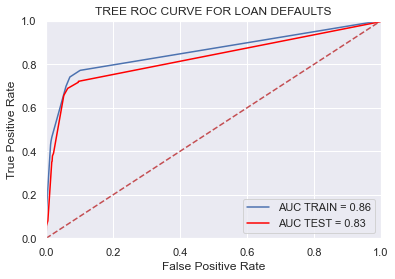

In [244]:
plt.title('TREE ROC CURVE FOR LOAN DEFAULTS')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color='red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- View my roc_curve using mathplotlib
- AUC_TRAIN is training data which is 86% area under the roc_curve (blue)
- AUC_TEST is test data which is 82% area under the roc_curve (red) 
- Obviously, test data is not as accurate as training data, then again decision tree has never seen this data before but just viewing this data over here it looks like reasonable model its not overfitt

In [245]:
#Display the Decision Tree using a Graphviz program for Mac we have to use tree_f.dot extension to proces the file
feature_cols = list(X.columns.values)
tree.export_graphviz(fm01_Tree,out_file='tree_f.dot',filled=True, rounded=True, 
                     feature_names = feature_cols, impurity=False, class_names=["Good","Bad"]  )

![](tree_f.png)

### Simple Decision Tree Graphviz Display Analysis: 
#### M_DEBTINC <= 0.5 (True) 
- The best indicator in this dataset for whether or not the loans defaulted is based on the M_Debt Income ratio flag if they had did not have Debt Income ratio flag value did not have missing value then class = Good their 3837 loans were not defaulted. If (M_DEBTINC =1 missing value was fixed) then 941 people did have the loans defaulted. 
- My chance of having the loans defaults decreases if my Debt Increase ratio is less than equal to 44% where class is equal to Good which is realistic 3434 people do not defaulted loans, while 313 people which 8% have their loan defaults. 
- The chance of not having loans defaults decrease if you have less 4.5 delinquencies report which makes sense if you have a lot of delinquencies, you might be more likely to default on a loan. In our case 3430 people do not loans defaulted, and only 243 people which only 6% have their loans defaults. 
- But if your Debt Income ratio is greater or equal to 44%, chance of having loans default increases looking at the Credit line age is less than or equal to 299 months 70 people have their loans defaulted which is 94% of the small sample size.

#### M_DEBTINC <= 0.5 (False)
- If Debt Income Ratio was missing in the data and looking at Delinquencies report where the class is bad means the probability of having loans default is higher to 61.5% showing 628 people have their loans defaults. 
- Similarly as we go further down the levels of the tree probability of getting loans defaults goes higher upto 81% looking the derogatory marks <= 0.5 on the current credit reports. 
- In contrast, I would looking at the value of the house is not a good indicator to whether or not the loans defaulted based on decision tree above. If the value of house is less than 72,000 dollars then 17 people have their loans defaults. And only 16 people will not have loans defaults almost (50-50) chances showing neutral correlatin to targetvariable. 



### List the variables included in the decision tree that predict loan default.

In [246]:
# The neat thing is that the Decision Tree that python creates allows you to traverse them,
# and pull out all the variables that are used 
# Its tree we traverse through it everytime we find a variable we add to a list


def getTreeVars( TREE, varNames ) :
    tree_ = TREE.tree_
    varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature ]

    nameSet = set()
    for i in tree_.feature :
        if i != _tree.TREE_UNDEFINED :
            nameSet.add( i )
    nameList = list( nameSet )
    parameter_list = list()
    for i in nameList :
        parameter_list.append( varNames[i] )
    return parameter_list

In [247]:
vars_tree_flag = getTreeVars(fm01_Tree, feature_cols)
for i in vars_tree_flag:
    print(i)

M_VALUE
IMP_VALUE
IMP_YOJ
M_DEROG
IMP_DEROG
IMP_DELINQ
IMP_CLAGE
M_DEBTINC
IMP_DEBTINC


### Develop a decision tree to predict the loss amount assuming that the loan defaults

- We are going to build the model for the loss amount assuming that the loan defaults 
- Before that, we are remove NaN values from target variables (LOSS AMOUNT) after their defaulted loans
- Flag for target variables True value Y_train[TARGET_A].isna() people who's loans defaulted have NaN values for loss amount. ~ makes it false for people who do not have Nan value for loss amount
- For the input variable X_train if we subset with F only true values are going to go into W_train variables only the records where the loans defaults. 
- For the target variable Y_train if we subset with F only true values are going to go into Z_train variables only the records where the loans defaults. 

In [248]:
F = ~ Y_train[TARGET_A].isna()   
W_train = X_train[F].copy() #Flag for input variables its better practice to make a copy of it 
Z_train = Y_train[F].copy() #Flag for target variables its better practice to make a copy of it

F = ~ Y_test[TARGET_A].isna()   
W_test = X_test[F].copy() #Flag for input variables its better practice to make a copy of it 
Z_test = Y_test[F].copy() #Flag for target variables its better practice to make a copy of it


In [249]:
print(Z_train.describe()) #we are doing describe to see if we have any outliers
print(Z_test.describe())
print("\n")

       TARGET_BAD_FLAG  TARGET_LOSS_AMT
count  941.0            941.000000     
mean   1.0              13421.645058   
std    0.0              10662.481428   
min    1.0              224.000000     
25%    1.0              5817.000000    
50%    1.0              10959.000000   
75%    1.0              17635.000000   
max    1.0              73946.000000   
       TARGET_BAD_FLAG  TARGET_LOSS_AMT
count  248.0            248.000000     
mean   1.0              13387.758065   
std    0.0              11508.703991   
min    1.0              320.000000     
25%    1.0              5214.500000    
50%    1.0              11336.500000   
75%    1.0              16734.000000   
max    1.0              78987.000000   




### Handling Outliers 
- Usually decision trees are immune to outliers 
- However, if your target as outliers, infact decision tree and all your models will have problems 
- They both about average around 13000 dollars worth of loss amounts assuming loans defaults in both dataset
- However, maximum is loss amount is 73000 in training dataset and 78000 dollars in test dataset worth of loss amount in both dataset
- To have realistic loss amount let's cap it at 55000 dollars worth of loss amount if the loans defaults

In [250]:
F = Z_train[TARGET_A] > 55000
Z_train.loc[F, TARGET_A] = 55000

F = Z_test[TARGET_A] > 55000
Z_test.loc[F, TARGET_A] = 55000

print(Z_train.describe()) #we are doing describe to see if we have any outliers
print(Z_test.describe())
print("\n")

       TARGET_BAD_FLAG  TARGET_LOSS_AMT
count  941.0            941.000000     
mean   1.0              13375.273114   
std    0.0              10453.578696   
min    1.0              224.000000     
25%    1.0              5817.000000    
50%    1.0              10959.000000   
75%    1.0              17635.000000   
max    1.0              55000.000000   
       TARGET_BAD_FLAG  TARGET_LOSS_AMT
count  248.0            248.000000     
mean   1.0              13217.588710   
std    0.0              10711.652535   
min    1.0              320.000000     
25%    1.0              5214.500000    
50%    1.0              11336.500000   
75%    1.0              16734.000000   
max    1.0              55000.000000   




## Decision Regression Tree
### Develop a decision tree to predict the loss amount assuming that the loan defaults
- amt_01_Tree means flag model 01 and its a tree 
- maximum depth of the decision tree is set to 4 levels deep 
- fm01_Tree = tree.DecisionTreeClassifier( max_depth = 4)
- fm01_Tree = fm01_Tree.fit(W_train, Z_train[TARGET_A]) 
- We are fitting the decision tree using training data, target data on the loss amounts (assuming the loans defaults). This will allow us to build the decision tree
- Will like to see how accurate the model is we are going to predict. 


In [251]:
amt_m01_Tree = tree.DecisionTreeRegressor( max_depth = 4)
amt_m01_Tree = amt_m01_Tree.fit( W_train, Z_train[TARGET_A])

Z_Pred_train = amt_m01_Tree.predict(W_train)
Z_Pred_test = amt_m01_Tree.predict(W_test)

Calculate the RMSE for both the training data set and the test data set

In [252]:
# print("MEAN Train", Z_train[TARGET_A].mean())
# print("MEAN Test", Z_test[TARGET_A].mean())
# print( " ----- \n" )

RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

print("TREE RMSE Train:", RMSE_TRAIN )
print("TREE RMSE Test:", RMSE_TEST )

TREE RMSE Train: 4491.106341702886
TREE RMSE Test: 5574.966442540175


### Display the Decision Tree using a Graphviz program

In [253]:
RMSE_TREE = RMSE_TEST

feature_cols = list( X.columns.values )
vars_tree_amt = getTreeVars( amt_m01_Tree, feature_cols ) 
tree.export_graphviz(amt_m01_Tree,out_file='tree_a.dot',filled=True, rounded=True, feature_names = feature_cols, impurity=False, precision=0  )

![](tree_a.png)

### Regression Tree Graphviz Display Analysis: 
#### LOAN <= 22950 (True) 
- We can see as that the logic makes sense over smaller the loans less risky the person. Assuming the loans defaults the loss amount is smaller as well the amount that was not repaid of value 133750 dollars.
- If the loan amount was greater 11250 dollars we are looking number of credit lines. If number of credit line is less than 22 that shows the person usually have less loss amount not repaid of 13000 dollars. 
- Similarly, looking into Debt Income rate less or equal 0 indicates lesser loss amount not repaid as well based on the regression decision analysis above.
- As we observe the same trend in the regression tree loan amount was less than 4300 dollars, and the amount not repaid is 3306 dollars


#### LOAN <= 22950 (False) 
- On the other hand, bigger the loans more risky the person. Assuming the loans defaults the loss amount is bigger as well the amount was not repaid of value around 26000 dollars.
- Looking into Debt Income rate less or equal 34 indicates probability of loss amount being smaller 24,000 dollars which makes sense low debt income ratio less risky person higher chances of smaller loss amount. 
- Similarly, if the have too many credit lines, you might be risky because you have the potential to run up a lot of debt as we can IMP_CLNO <= 20 is false and reasoning for taking loans is consolidating debt than there is higher chance of having bigger loss amount of around 52000 dollars 

### List the variables included in the decision tree that predict loss amount.

In [254]:
for i in vars_tree_amt:
    print(i)

LOAN
z_REASON_DebtCon
IMP_VALUE
IMP_NINQ
IMP_CLNO
M_DEBTINC
IMP_DEBTINC


### Develop a Random Forest to predict the probability of default

Calculate the accuracy of the model on both the training and test data set

#### Random Forest 
- fm01_RF = RandomForestClassifier(n_estimators = 100, random_state=1)
- fm01_RF = fm01_RF.fit(X_train, Y_train[TARGET_F])
- n_estimators parameter is basically how many decision tree you're going to create 
- We are fitting the decision tree using training data, target data on the FLAG variable 
- We are going to predict whether or not the loans defaults with both training and test dataset
- Then will look at accuracy metrics what really happened in the training dataset, versus what we predicted. We will do the same thing for test data.

In [255]:
"""
RANDOM FOREST

"""
fm01_RF = RandomForestClassifier(n_estimators = 100, random_state=1)
fm01_RF = fm01_RF.fit(X_train, Y_train[TARGET_F])

Y_Pred_train = fm01_RF.predict(X_train)
Y_Pred_test = fm01_RF.predict(X_test)

print("\n=============\n")
print("RANDOM FOREST\n")
print("Probability of loans default")
print("Accuracy Train:", metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print("Accuracy Test:", metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))
print("\n")



RANDOM FOREST

Probability of loans default
Accuracy Train: 1.0
Accuracy Test: 0.912751677852349




- We have accuracy on our training dataset of 100% 
- Our accuracy metrics on test dataset is 91% is much better than decision tree

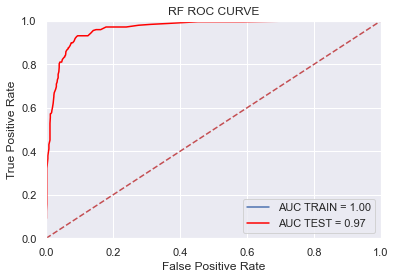

In [256]:
#p1 = grabbing the probability that the loans are defaulted

probs = fm01_RF.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve(Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_RF.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_RF = fpr_test
tpr_RF = tpr_test
auc_RF = roc_auc_test


# Create a graph that shows the ROC curves for both the training and test data set.
# Clearly label each curve and display the Area Under the ROC curve.
plt.title('RF ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Area under the roc curve for Random Forests is 97% 

In [257]:
def getEnsembleTreeVars( ENSTREE, varNames ) :
    importance = ENSTREE.feature_importances_ #this will pull the feature importance from our tree
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_ ) : #only keep the variables that their importances was above average
            v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
            theList.append( ( varNames[i], v ) )
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList

feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars( fm01_RF, feature_cols )

# List the variables included in the Random Forest that predict loan default.
for i in vars_RF_flag :
    print( i )

('M_DEBTINC', 100)
('IMP_DEBTINC', 96)
('IMP_CLAGE', 49)
('IMP_DELINQ', 46)
('LOAN', 45)
('IMP_VALUE', 41)
('IMP_MORTDUE', 39)
('IMP_CLNO', 38)
('IMP_YOJ', 32)
('IMP_DEROG', 27)


- M_DEBTINC and IMP_DEBTINC are important variable to predict loan default using random forest decision tree
- Random Forest decision tree Regressor for Continuous Target Variables
- Develop a Random Forest to predict the loss amount assuming that the loan defaults

### Develop a Random Forest to predict the loss amount assuming that the loan defaults

In [258]:
amt_m01_RF = RandomForestRegressor(n_estimators = 100, random_state=1)
amt_m01_RF = amt_m01_RF.fit( W_train, Z_train[TARGET_A] )

Z_Pred_train = amt_m01_RF.predict(W_train)
Z_Pred_test = amt_m01_RF.predict(W_test)

RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

print("RF RMSE Train:", RMSE_TRAIN )
print("RF RMSE Test:", RMSE_TEST )

RMSE_RF = RMSE_TEST

feature_cols = list( X.columns.values )
vars_RF_amt = getEnsembleTreeVars( amt_m01_RF, feature_cols )

for i in vars_RF_amt :
    print( i )

RF RMSE Train: 1197.9405112156378
RF RMSE Test: 2849.498972119216
('LOAN', 100)
('IMP_CLNO', 13)
('IMP_DEBTINC', 5)


### Gradient Boosting 
### Develop a Gradient Boosting model to predict the probability of loan default

In [259]:
fm01_GB = GradientBoostingClassifier(random_state=1)
fm01_GB = fm01_GB.fit(X_train, Y_train[TARGET_F])

Y_Pred_train = fm01_GB.predict(X_train)
Y_Pred_test = fm01_GB.predict(X_test)

# Calculate the accuracy of the model on both the training and test data set

print("\n=============\n")
print("GRADIENT BOOSTING\n")
print("Probability of loan default")
print("Accuracy Train:",metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))
print("\n")



GRADIENT BOOSTING

Probability of loan default
Accuracy Train: 0.9238674496644296
Accuracy Test: 0.9043624161073825




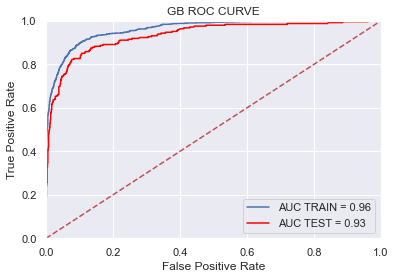

In [260]:
probs = fm01_GB.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_GB.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_GB = fpr_test
tpr_GB = tpr_test
auc_GB = roc_auc_test


# Create a graph that shows the ROC curves for both the training and test data set.
# Clearly label each curve and display the Area Under the ROC curve.
plt.title('GB ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [261]:
feature_cols = list( X.columns.values )
vars_GB_flag = getEnsembleTreeVars( fm01_GB, feature_cols )

# List the variables included in the Gradient Boosting that predict loan default.
for i in vars_GB_flag :
    print(i)

('M_DEBTINC', 100)
('IMP_DEBTINC', 29)
('IMP_DELINQ', 19)
('IMP_CLAGE', 14)


### Develop a Gradient Boosting to predict the loss amount assuming that the loan defaults

In [262]:
# Calculate the RMSE for both the training data set and the test data set
amt_m01_GB = GradientBoostingRegressor(random_state=1)
amt_m01_GB = amt_m01_GB.fit( W_train, Z_train[TARGET_A] )

Z_Pred_train = amt_m01_GB.predict(W_train)
Z_Pred_test = amt_m01_GB.predict(W_test)

RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

print("GB RMSE Train:", RMSE_TRAIN )
print("GB RMSE Test:", RMSE_TEST )

RMSE_GB = RMSE_TEST

feature_cols = list( X.columns.values )
vars_GB_amt = getEnsembleTreeVars( amt_m01_GB, feature_cols )


# List the variables included in the Gradient Boosting that predict loss amount.
for i in vars_GB_amt :
    print(i)


GB RMSE Train: 1236.1029566215122
GB RMSE Test: 2369.470492466002
('LOAN', 100)
('IMP_CLNO', 15)
('IMP_DEBTINC', 6)
('M_DEBTINC', 5)


### ROC Curves for all 3 Models 
- Generate a ROC curve for the Decision Tree, Random Forest, and Gradient Boosting models using the Test Data Set
- Use different colors for each curve and clearly label them
- Include the Area under the ROC Curve (AUC) on the graph.

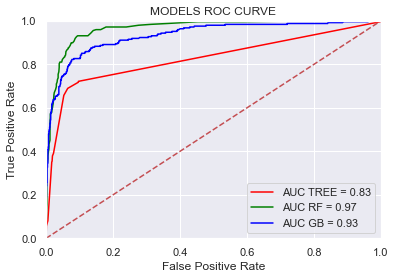

Root Mean Square Average For Loss Amount
TREE 5574.966442540175
RF 2849.498972119216
GB 2369.470492466002


In [263]:
plt.title('MODELS ROC CURVE')
plt.plot(fpr_tree, tpr_tree, 'b', label = 'AUC TREE = %0.2f' % auc_tree, color="red")
plt.plot(fpr_RF, tpr_RF, 'b', label = 'AUC RF = %0.2f' % auc_RF, color="green")
plt.plot(fpr_GB, tpr_GB, 'b', label = 'AUC GB = %0.2f' % auc_GB, color="blue")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



print("Root Mean Square Average For Loss Amount")
print("TREE", RMSE_TREE)
print("RF", RMSE_RF)
print("GB", RMSE_GB)


### Summary Report
#### Include a discussion of the Decision Tree diagrams. Do they appear to make sense?
#### Simple Decision Tree Graphviz Display Analysis: 
#### M_DEBTINC <= 0.5 (True) 
- The best indicator in this dataset for whether or not the loans defaulted is based on the M_Debt Income ratio flag if they had did not have Debt Income ratio flag value did not have missing value then class = Good their 3837 loans were not defaulted. If (M_DEBTINC =1 missing value was fixed) then 941 people did have the loans defaulted. 
- My chance of having the loans defaults decreases if my Debt Increase ratio is less than equal to 44% where class is equal to Good which is realistic 3434 people do not defaulted loans, while 313 people which 8% have their loan defaults. 
- The chance of not having loans defaults decrease if you have less 4.5 delinquencies report which makes sense if you have a lot of delinquencies, you might be more likely to default on a loan. In our case 3430 people do not loans defaulted, and only 243 people which only 6% have their loans defaults. 
- But if your Debt Income ratio is greater or equal to 44%, chance of having loans default increases looking at the Credit line age is less than or equal to 299 months 70 people have their loans defaulted which is 94% of the small sample size.

#### M_DEBTINC <= 0.5 (False)
- If Debt Income Ratio was missing in the data and looking at Delinquencies report where the class is bad means the probability of having loans default is higher to 61.5% showing 628 people have their loans defaults. 
- Similarly as we go further down the levels of the tree probability of getting loans defaults goes higher upto 81% looking the derogatory marks <= 0.5 on the current credit reports. 
- In contrast, I would looking at the value of the house is not a good indicator to whether or not the loans defaulted based on decision tree above. If the value of house is less than 72,000 dollars then 17 people have their loans defaults. And only 16 people will not have loans defaults almost (50-50) chances showing neutral correlatin to targetvariable. 

#### Regression Tree Graphviz Display Analysis: 
#### LOAN <= 22950 (True) 
- We can see as that the logic makes sense over smaller the loans less risky the person. Assuming the loans defaults the loss amount is smaller as well the amount that was not repaid of value 133750 dollars.
- If the loan amount was greater 11250 dollars we are looking number of credit lines. If number of credit line is less than 22 that shows the person usually have less loss amount not repaid of 13000 dollars. 
- Similarly, looking into Debt Income rate less or equal 0 indicates lesser loss amount not repaid as well based on the regression decision analysis above.
- As we observe the same trend in the regression tree loan amount was less than 4300 dollars, and the amount not repaid is 3306 dollars


#### LOAN <= 22950 (False) 
- On the other hand, bigger the loans more risky the person. Assuming the loans defaults the loss amount is bigger as well the amount was not repaid of value around 26000 dollars.
- Looking into Debt Income rate less or equal 34 indicates probability of loss amount being smaller 24,000 dollars which makes sense low debt income ratio less risky person higher chances of smaller loss amount. 
- Similarly, if the have too many credit lines, you might be risky because you have the potential to run up a lot of debt as we can IMP_CLNO <= 20 is false and reasoning for taking loans is consolidating debt than there is higher chance of having bigger loss amount of around 52000 dollars 




#### Which variables appear to be most predictive of loan default? Do they make sense
- The M_DEBTINC ratio flag is best indicator for predicting of default loans. According to me, this one doesn't make sense as much since M_DEBTINC ratio flag is 0 when they do not have missing value for Debt income ratio column in the dataset. When M_DEBTINC ratio flag is set to 1 it had missing value means we have fixed this data. 
- Our model shouldn't have predicted this value based flag variables because we cannot assume if person doesn't have missing value for the Debt Income ratio, they did not have defaulted loans. On the other hand, if the person does have missing values and fixed it according M_DEBTINC flag they have defaulted loans.
- The IMP_DEBTINC ratio makes more sense should have best indicator for predictive of loan defaults compare to M_DEBTINC flag because the if we have lower debt income ratio below 44% the chances of not loans defaulted increases as they might have paying bills on time, also riskiers compare to people have higher debt income ratio. 
- All the other variables do make sense in terms for predicting loan defaults as we go to deeper level in the tree.
- The variables that appears to be most predictive of loan defaults are following below. 
- M_DEBTINC, IMP_DEBTINC, IMP_CLAGE
- IMP_DELINQ, LOAN, IMP_VALUE
- IMP_MORTDUE, IMP_CLNO, IMP_YOJ, IMP_DEROG


#### Which variables appear to be most predictive of loss amount? Do they make sense?
- The LOAN variables appear to be most predictive of loss amount based all the tree models. The loan variable does logically make sense as well if person has smaller loans less risky the person, the loss amount that was not repaid is smaller compare to people who have bigger loans. 
- If loan amount is greater than certain threshold amount, next variables we looks is IMP_CLNO the number of credit line person has a too many credit lines they might be risky because you have the potential to run up a lot of debt there is higher chance of having bigger loss amount that was not repaid. 
- Also, if the reasoning for taking loans is consolidating debt(z_REASON_DebtCon) the probability of having bigger loss amount increases as we go deeper level in the tree based on other criteria met. 
- All the other variables do make sense in terms for predicting loss amount as we go to deeper level in the tree
- The variables that appears to be most predictive of loss amount are following below.
- LOAN, IMP_CLNO, z_REASON_DebtCon
- M_DEBTINC, IMP_DEBTINC
- IMP_VALUE, IMP_DELINQ, IMP_NINQ, 
- z_JOB_Mgr, IMP_VALUE, IMP_DEROG


#### If you were to select one of these models to put into production, which would it be? Why would you select this model?
- Based on the final ROC curve of all 3 models Decision Tree, Random Forest, and Gradient Boosting. 
- I would select Random Forest model to put into production for predicting loan defaults.
- And, I would select Gradient Boosting to put into production for predicting loss amount. 

#### Reasoning for Random Forest Model (Predicting Loans Defaults)
- The reason I would select Random Forest model because based on the final ROC curve for all 3 models we can see Random Forest is considerably more accurate with 97% covering area under the curve compare to Gradient Boosting is at 93% accuracy, is a little bit closer to Gradient Boosting showing ensemble appoarch has worked better in predicting loans defaults, and Simple Decision Tree even though is a good model as lowest accuracy of 83% compare to other models. 

#### Reasoning for Gradient Boosting Model (Predicting Loss Amount)
- Also, the reason I would select Gradient Boosting for predicting loss amount looking at the RMSE (Root Mean Square Error) of measuring the difference between values predicted by a model and their actual values. The RMSE average error for loss amount for Gradient Boosting is small 2369 dollars compare to other models. Also, gradient boosting tends to build very shallow trees but we have to look at is it legal to use based business rules before deploying in production. The RMSE for Random Forest is 2869 dollars relatively close to Gradient Boosting model.  


# BINGO BONUS (NEXT PAGE)
- Suggestion: Explore different parameters for the Decision Trees, Random Forests, and Gradient Boosting. Briefly discuss whether or not they had an effect on the results.
- Suggestion: Rerun the programs numerous times and make note of the accuracy of each model and the variables that are found to be predictive. Based upon this Monte Carlo simulation, comment on the expected accuracy of each model and the variables most likely to be predictive.